<a href="https://colab.research.google.com/github/Blvisse/Breast-Cancer-Causality/blob/modelling/notebooks/Causal_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install causalnex

     |████████████████████████████████| 140 kB 15.7 MB/s 
     |████████████████████████████████| 22.3 MB 55.6 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 1.9 MB 26.2 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.11.2-cp37-cp37m-linux_x86_64.whl size=68511 sha256=07ef7447b58e4d3ee4050597ae85ea9c87dc5752ab14fb4d28bd5918258d18aa
  Stored in directory: /root/.cache/pip/wheels/23/5f/62/304b411f20be41821465a82bc98baabc5e68c3cdd1eb99db71
Successfully built wrapt
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1
ERROR: pip's dependency resolver does not currently take into account all

In [25]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE,EDGE_STYLE
from IPython.display import Image 
import pygraphviz
import networkx as nx
from causalnex.structure.notears import from_pandas, from_pandas_lasso

In [8]:
data=pd.read_csv('/content/final_data.csv')

In [9]:
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,0,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,0,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,0,12.45,15.70,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,0,18.25,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1,14.05,27.15,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,15.30,33.17,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
491,0,20.92,25.09,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
492,0,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
493,0,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


## Split data into training and validation

In [10]:
#step one split data
from sklearn.model_selection import train_test_split

train,valid=train_test_split(data,test_size=0.3,random_state=42)

In [53]:
#select our intended dataset
mean_training=train[['diagnosis','compactness_mean','concave points_mean','radius_mean','fractal_dimension_mean','concavity_mean']].copy()
mean_val=valid[['diagnosis','compactness_mean','concave points_mean','radius_mean','fractal_dimension_mean','concavity_mean']].copy()

## Learn structure using notreas

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


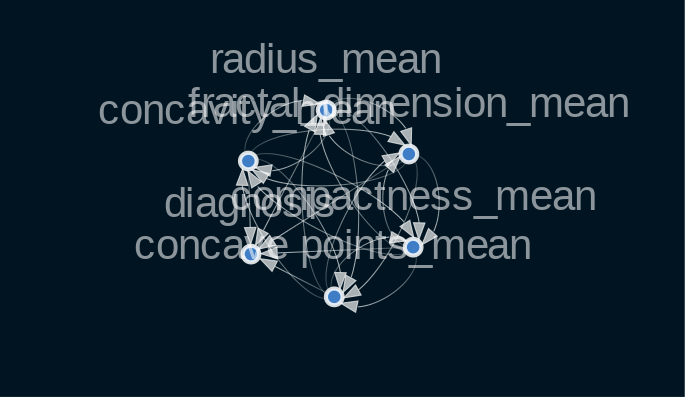

In [32]:
#we use the notreas algorthim to learn structures in the dataset
model_graph=from_pandas(mean_training,tabu_parent_nodes=['diagnosis'])


#we visaulize the structure that notreas has learned 
graph=plot_structure(model_graph,graph_attributes={"scale": "1"},all_edge_attributes=EDGE_STYLE.WEAK,all_node_attributes=NODE_STYLE.WEAK)
# sm = model_graph
# fig, ax = plt.subplots()
# nx.draw_circular(sm, ax=ax)
# fig.show()

Image(graph.draw(format="png"))

## Prune the structure of the tree 

The algo might have picked up some corelations that aren't very strong and hence we call the remove_edges_below_threshold function which drops edges/s tructures below a certain significance level

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


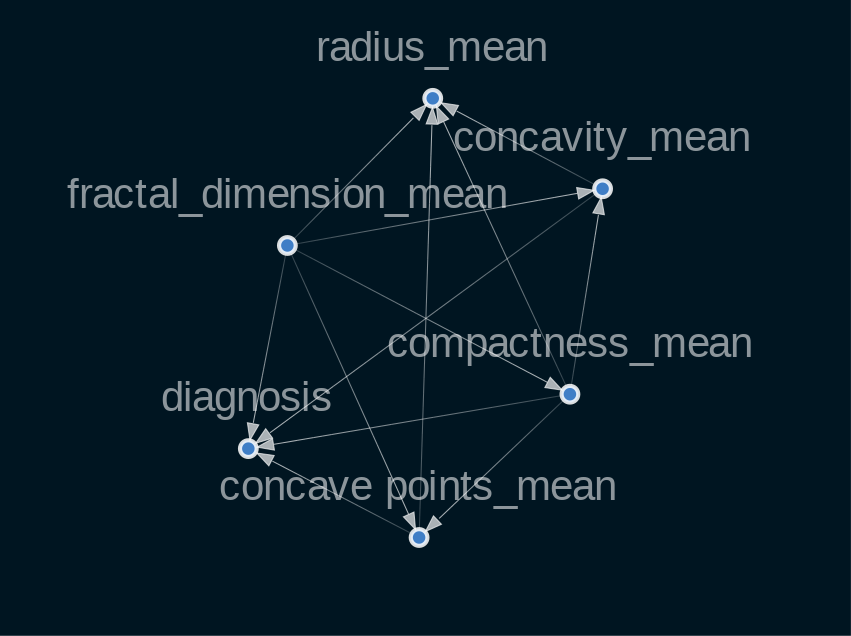

In [33]:
#we cut down on edges that don't hold any statistcal relationship
#we drop edges that are bewlo 0.8 
model_graph.remove_edges_below_threshold(0.8)
graph_refined=plot_structure(
    model_graph,
    graph_attributes={"scale":1},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK
)

Image(graph_refined.draw(format="png"))

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


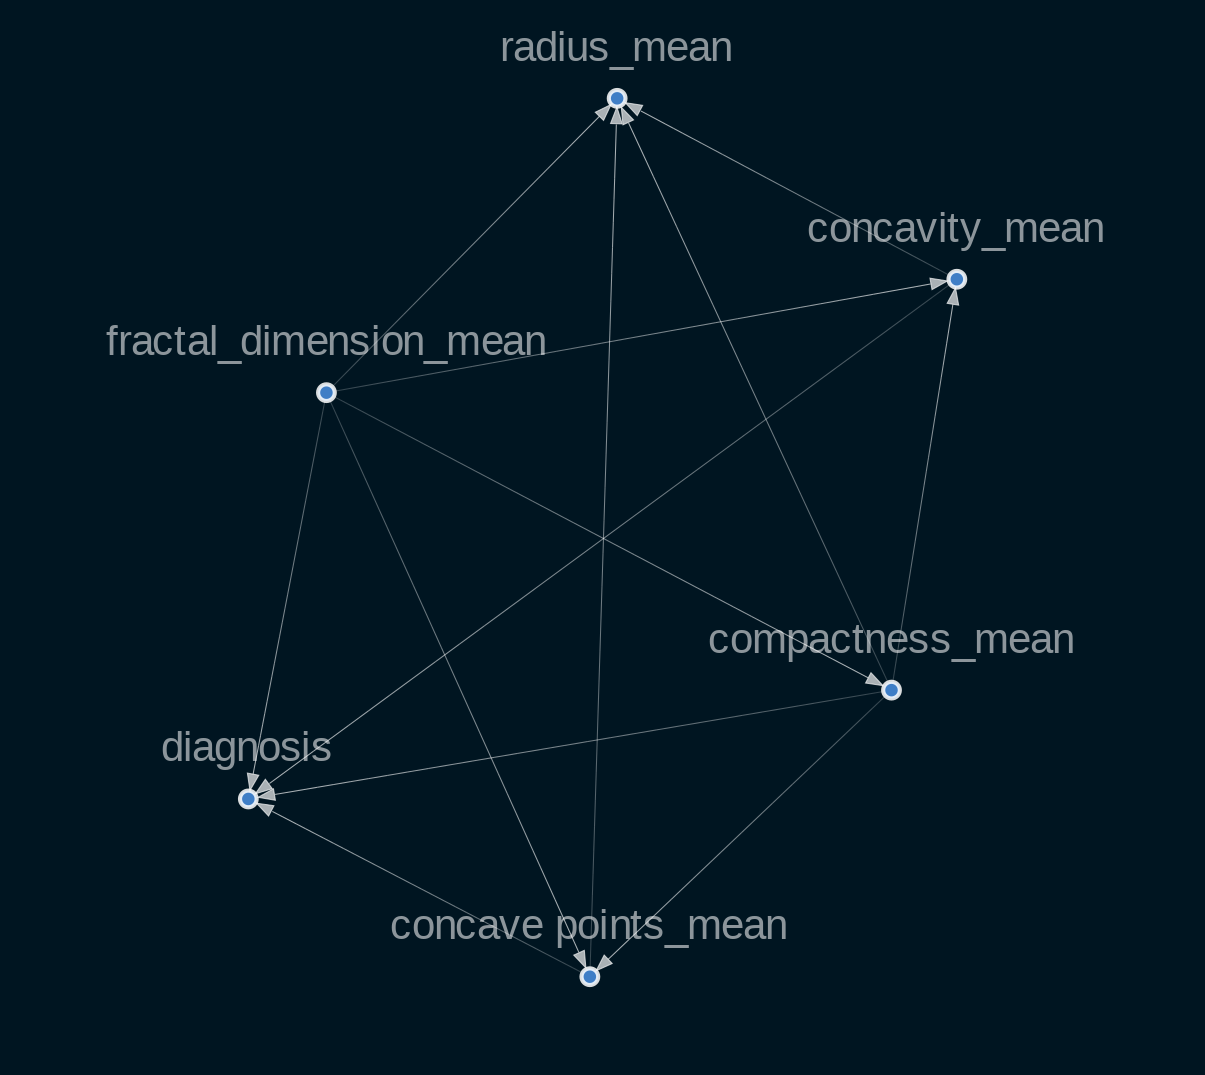

In [34]:
#create a new data model to be  studied to determine structure, we specify the use of structures that are above 0.8 threshold values
model_graph_refined=from_pandas(mean_training,w_threshold=0.8)
graph_refined2=plot_structure(
    model_graph,
    graph_attributes={"scale":2},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK
)

Image(graph_refined2.draw(format="png"))

we notice the columns with direct effect on the diagnosis is concvity_mean, fractal_dimesnion_mean,concave_points_mean

## Similarity index of the graphs

In [35]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

In [41]:
jaccard_similarity(model_graph_refined.edges(),model_graph.edges())

0.5

The similarity index between our training data and our learned structure is 0.5.

This states that the intersection of data points between our original model and our causal model is only 50%

In [42]:
def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

In [43]:
Jaccar_score(model_graph_refined.edges(),model_graph.edges())

0.5

# Modelling difference

We train the two datasets to compare their performance on a simple RandomForest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

## Orginal dataframe 

In [61]:
X=train.drop(labels=['diagnosis'],axis=1)
y=train['diagnosis']
rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [62]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [63]:
rf.score(X_train,y_train)

1.0

In [64]:
preds=rf.predict(X_test)

f1_score(y_test,preds)

0.976

In [50]:
validX=valid.drop(labels=['diagnosis'],axis=1)
validy=valid['diagnosis']

rf.score(validX,validy)

0.9664429530201343

## Data Subset

In [59]:
from sklearn.metrics import f1_score

X=mean_training.drop(labels=['diagnosis'],axis=1)
y=mean_training['diagnosis']


X_train,X_test,y_train,y_test=train_test_split(X,y)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

1.0

In [58]:
preds=rf.predict(X_test)

In [60]:
f1_score(y_test,preds)

0.7166666666666668

In [55]:
valX=mean_val.drop(labels=['diagnosis'],axis=1)
valy=mean_val['diagnosis']

rf.score(valX,valy)

0.912751677852349

# Findings

We do see a drop in performance when the model uses the subset of our data as compared to when it does use the whole dataset. 

It can indicate that we weren't successful to capture the proper causality effects within the dataset and hence the drastic performance drop

It can also be caused the very minimal data that made the model underfit in this case 